# BASIC CONFIGURATIONS

In [18]:
### Setup the library ###
import pyrogue as pr
import os, sys
import matplotlib.pyplot as plt
import time
import datetime
import numpy as np
import math
import pprint
import inspect 
top_level=f'{os.getcwd()}/../'
rootTopLevel = top_level+'script/'
pr.addLibraryPath( rootTopLevel )

import setupLibPaths
from dataDebug import dataDebug

import ePix320kM as devBoard

import pyrogue.protocols
import pyrogue.utilities.fileio
import rogue

args = None

In [19]:
# ONLY RUN ONCE!
# Defining root
# If crashes, make sure the deve is correct.
root =  devBoard.Root(   
        top_level  = top_level,
        dev        = '/dev/datadev_1',
        pollEn     = False,
        initRead   = True,
        pciePgpEn  = True,
        justCtrl   = False,
        DDebugSize = 4000)
root.start()

# example showing a read
AxiVersion = root.Core.AxiVersion
print ( '###################################################')
print ( '#             Firmware Version                    #')
print ( '###################################################')
AxiVersion.printStatus()
print ( '###################################################')

Root.Core.Si5345Pll.Page0.DataBlock.setPollInterval(1)
Start: Started zmqServer on ports 9099-9101
    To start a gui: python -m pyrogue gui --server='localhost:9099'
    To use a virtual client: client = pyrogue.interfaces.VirtualClient(addr='localhost', port=9099)
Root.Core.AxiVersion count reset called
Root.pciePgp.AxiPcieCore.AxiVersion count reset called
###################################################
#             Firmware Version                    #
###################################################
Path         = Root.Core.AxiVersion
FwVersion    = 0x1010700
UpTime       = 2:07:25
GitHash      = 0xd8589bb81a7ac1c46f7fa66b74dd01f2604fd0a6
XilinxDnaId  = 0x400200000139d7204c70e105
FwTarget     = "ePixHRM320k
BuildEnv     = Vivado v2023.1
BuildServer  = rdsrv314 (Ubuntu 20.04.6 LTS)
BuildDate    = Sat 06 Apr 2024 09:28:55 AM PDT
Builder      = dnajjar"
###################################################


In [34]:
# Configure clock to 168 MHz and configures all ASICS
root.InitASIC([4,1,0,1,0])

Rysync ASIC started
Did not find specific ASIC1 file. Using generic.
Did not find specific ASIC2 file. Using generic.
Did not find specific ASIC3 file. Using generic.
Did not find specific ASIC4 file. Using generic.
Init ASIC script started
Loading PLL configuration
Loading supply configuration
Loading /afs/slac.stanford.edu/g/controls/development/users/dnajjar/sandBox/epix-hr-m-320k/software/notebook/..//config/ePixHRM320k_PowerSupply_Enable.yml
Loading lane delay configurations
Loading /afs/slac.stanford.edu/g/controls/development/users/dnajjar/sandBox/epix-hr-m-320k/software/notebook/..//config/ePixHRM320k_cb000018f0322301_SspMonGrp_carrier.yml
Loading waveforms configuration
Loading /afs/slac.stanford.edu/g/controls/development/users/dnajjar/sandBox/epix-hr-m-320k/software/notebook/..//config/ePixHRM320k_RegisterControl.yml
Loading batcher configurations
Loading /afs/slac.stanford.edu/g/controls/development/users/dnajjar/sandBox/epix-hr-m-320k/software/notebook/..//config/ePixHRM32

In [21]:
run helperFunctions.ipynb

In [22]:
disableAllReceivers()

In [23]:
#get locked lanes
root.getLaneLocks()

ASIC0: 0xffffff
ASIC1: 0x0
ASIC2: 0x3effff
ASIC3: 0x0


In [24]:
printLaneMask()

ASIC0: 0x0
ASIC1: 0x0
ASIC2: 0xc10000
ASIC3: 0x0


In [25]:
#Enable data receivers and run some triggers
root.enableDataRcv(True)
root.enableAllAsics(True)
root.Trigger()

ASIC:0 F#:47503 Mask:0x100
ASIC:2 F#:47503 Mask:0xc10202
ASIC:3 F#:47503 Mask:0xffffff
ASIC:1 F#:47503 Mask:0xffffff


In [26]:
# Obtain descrambled single frame data from ASICs from DataReceiver. Data receiver is down sampled.
root.printDataReceiverStatus()
    
frame = [None for i in range(4)]
for asicIndex in range(4):
    frame[asicIndex] = getattr(root, f"DataReceiver{asicIndex}").Data.get()

Checkpoint: DataReceiver 0 has 1 frames
Checkpoint: DataReceiver 1 has 1 frames
Checkpoint: DataReceiver 2 has 1 frames
Checkpoint: DataReceiver 3 has 1 frames


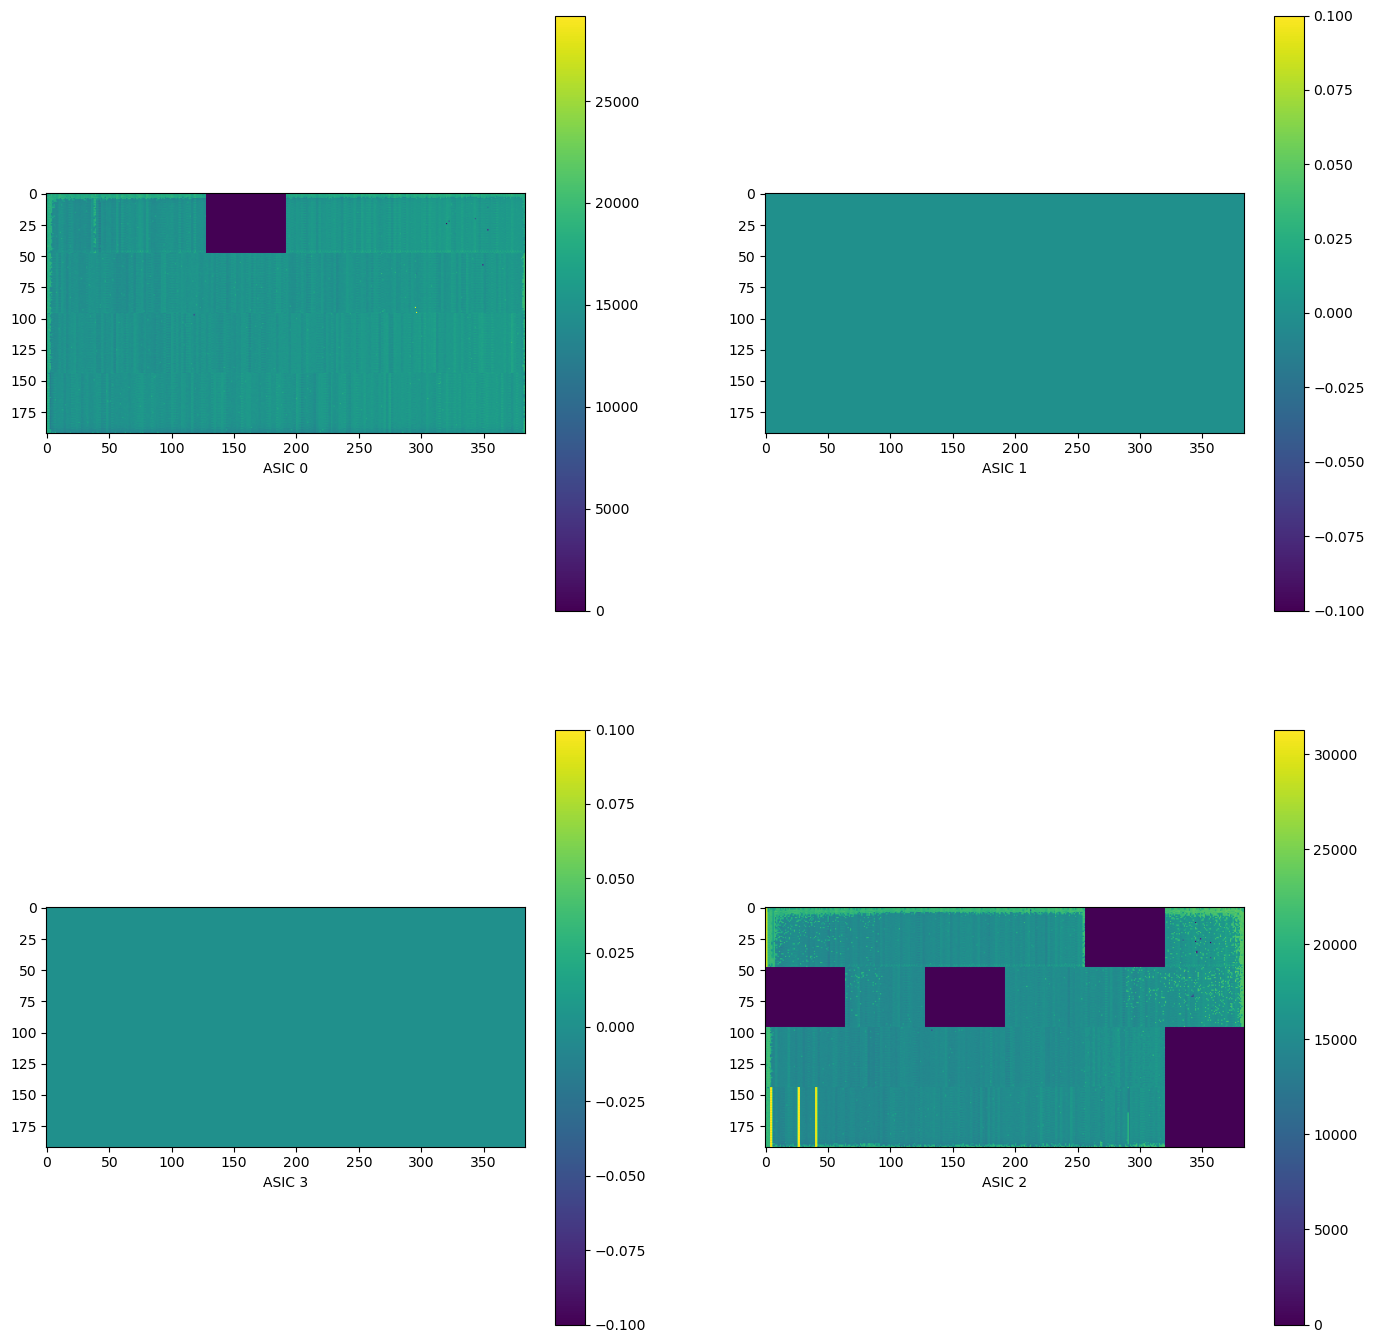

In [28]:
plotReceiverFrames()

In [29]:
# Steps = clock period of 168Mhz (5.95ns)
# Acq1 is 20us
# R0 after Acq1
# R0 Width set to 1.920uS
# SR0 needs to be launched after R0 delay + R0 width + alpha



# ------------------- 20 us integration time
AcqWidth = 3125
AcqDelay = 260
setAcq1(AcqWidth, AcqDelay)

R0Width = 3425
R0Delay = 100
setR0(R0Width, R0Delay)

SR0Width = 38000
SR0Delay = R0Width + R0Delay + 10
setSR0(SR0Width, SR0Delay)

# ------------------- 1 us integration time
AcqWidth = 160
AcqDelay = 260
setAcq1(AcqWidth, AcqDelay)

R0Width = 3425
R0Delay = 100
setR0(R0Width, R0Delay)

SR0Width = 38000
SR0Delay = R0Width + R0Delay + 10
setSR0(SR0Width, SR0Delay)

# Print human-readable values
print(f'-------------------------')
baseline_int_time = REGCTRL.AcqDelay1_us.get() - REGCTRL.R0Delay_us.get()
integration_time = REGCTRL.AcqWidth1_us.get()
print(f'Baseline time:    {baseline_int_time} uS')
print(f'Integration time: {integration_time} uS')
print(f'Sampling done at: {REGCTRL.AcqWidth1_us.get()+REGCTRL.AcqDelay1_us.get()} uS')
print(f'-------------------------')

Acq1 Width set to 20.000uS
Acq1 Delay set to 1.664uS
R0 Width set to 21.920uS
R0 Delay set to 0.640uS
SR0 Width set to 226.190uS
SR0 Delay set to 21.042uS
Acq1 Width set to 1.024uS
Acq1 Delay set to 1.664uS
R0 Width set to 21.920uS
R0 Delay set to 0.640uS
SR0 Width set to 226.190uS
SR0 Delay set to 21.042uS
-------------------------
Baseline time:    1.024 uS
Integration time: 1.024 uS
Sampling done at: 2.6879999999999997 uS
-------------------------


# Pixel/ADCs optimal biasing

In [27]:
# Set optimal values for Pixel analog references
ASIC3.RefinN.set(4)
ASIC3.RefinP.set(4)

# ADC settings
ASIC3.DHg.set(True)    # Set High gain
ASIC3.S2D_1_b.set(0)   # Set bias current to max (min value)
ASIC3.Ref_gen_d.set(2) # Set 'common-mode' voltage of S/H stage
ASIC3.RefGenB.set(2)   # Don't touch

# Pixel gain mode - Select operation mode

In [28]:
# Uncomment for Fixed High-Gain
# Set threshold to the minimum voltage (maximum energy, should not switch)
ASIC3.CompTH_ePixM.set(0)
ASIC3.Precharge_DAC_ePixM.set(40)

# Uncomment for Fixed Low-Gain
# ASIC3.CompTH_ePixM.set(63)
# ASIC3.Precharge_DAC_ePixM.set(50)

# Uncomment for Augo-Gain switching
# Set threshold to the minimum voltage (maximum energy, should not switch)
# ASIC3.CompTH_ePixM.set(10)
# ASIC3.Precharge_DAC_ePixM.set(40)


# Writing data to a rogue format file on full rate

In [35]:
clearUpStreamPpg()
clearDownStreamPpg()
clearSspMonGrp()
clearDigAsicStrmReg()

In [36]:
root.enableDataRcv(False)
root.disableAndCleanAllFullRateDataRcv()
root.enableAllAsics(False)
root.enableDataDebug(False)

root.enableAsic(0, True)
root.enableAsic(2, True)

ssdPath = "/u1/ePixHRM320k/acquisition"
filename = f"{ssdPath}/test64212.dat"
rate = 5000 # HZ
frames = 10000

root.acquireToFile(filename, frames, rate)

Acquisition started: filename: /u1/ePixHRM320k/acquisition/test64212.dat, rate: 5000, #frames:10000
Stop Triggers command executed
Set Auto Trigger command executed
Start Auto Trigger command executed
Triggers sent: 10000
Stop Triggers command executed
Received on channel 0 9985 frames...
Received on channel 1 0 frames...
Received on channel 2 9987 frames...
Received on channel 3 0 frames...
Waiting for file to close...
Acquisition complete and file closed


In [37]:
getPKREGCounters([1,0,1,0])
getUpStreamPpgFrmCnt()
getDownStreamPpgFrmCnt()

DigAsicStrmRegister0 FrameCount=10000 disable=0x0
DigAsicStrmRegister2 FrameCount=10000 disable=0xc10000
Upstream pgp got 10000 frames
Upstream pgp got 0 frames
Upstream pgp got 10000 frames
Upstream pgp got 0 frames
Downstream pgp got 1808 frames
Downstream pgp got 0 frames
Downstream pgp got 1808 frames
Downstream pgp got 0 frames


In [38]:
readFromFile(filename)

ASIC 0: Extracted 10000 frames0 frames
ASIC 1: Extracted 0 frames
ASIC 2: Extracted 10000 frames
ASIC 3: Extracted 0 frames


In [15]:
for i in range(numOfAsics):
    print("ASIC {}: Extracted {} frames".format(i,np.shape(readerReceiver[i].getData())[2]))

ASIC 0: Extracted 9960 frames
ASIC 1: Extracted 0 frames
ASIC 2: Extracted 9953 frames
ASIC 3: Extracted 0 frames
